# Machine learning

Vimos que dentro de aprendizaje supervisado tenemos problemas de clasificación y de regresión.

En este notebook vamos a comenzar trabajando con un problema de clasificación.

Vamos a armar datasets sintéticos de 2 features y 2 clases. Luego, trataremos de aprender a clasificarlo utilizando árboles de decisión.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Generamos un dataset sintético:

In [2]:
#!pip install sklearn 

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2,random_state=0, cluster_std=1.3)

In [4]:
X.shape

(1000, 2)

In [5]:
y.shape

(1000,)

Lo graficamos utilizando como hue la clase a la que pertenece el punto:

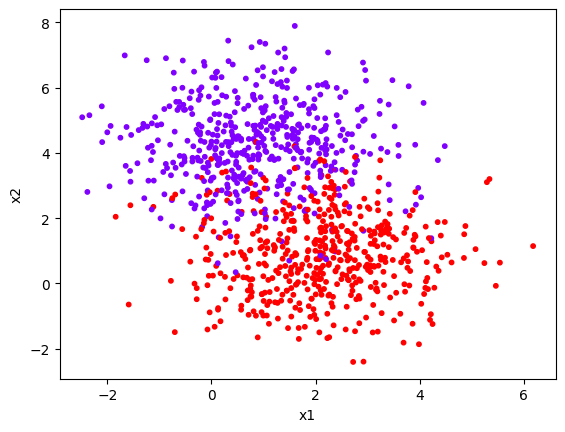

In [6]:
#Variables predictivas, matiz según "y", tamaño de los puntos, mapa de color de matiz.
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='rainbow') 
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Para aprender clasificar estos puntos, vamos a utilizar un DecisionTreeClassifier de sklearn.

Como vimos en temas anteriores, sklearn tiene muchos módulos. Uno de ellos es tree que es donde vamos a encontrar el DecisionTreeClassifier.

Primero que nada, tenemos que instanciar un decision tree:

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)

Al igual que los Imputers o Encoders que vimos anteriormente, el decision tree tiene un método fit. Este método fit nos sirve para entrenar el modelo. 

Al ser un problema de aprendizaje supervisado, tenemos X e y:

In [8]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3)

La siguiente función, nos permite ver de forma gráfica el dominio de decision que toma nuestro arbol entrenado.

No es necesario prestar atención a la función ni entender el código en este caso. Simplemente la usaremos para graficar:

In [9]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    yp=model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = yp.reshape(xx.shape)
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

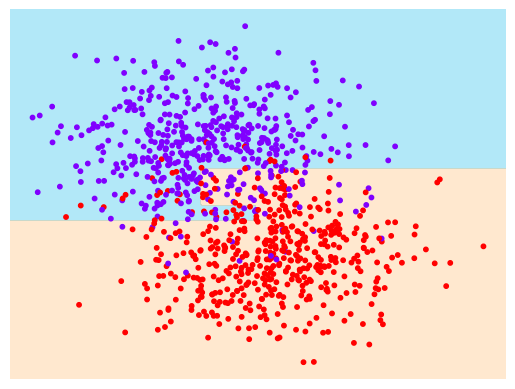

In [10]:
visualize_classifier(tree, X, y)

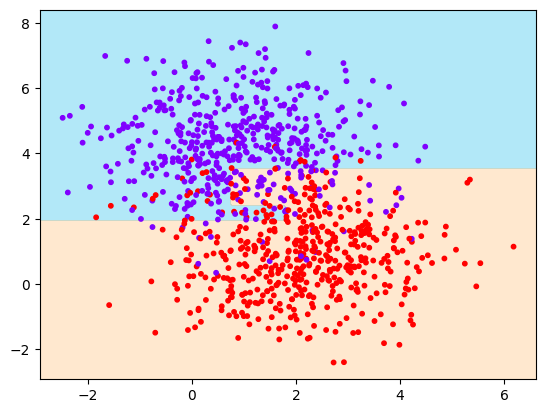

In [11]:
from f_func import malla

# Plotea los puntos de entrenamiento de las variables predictivas, con matiz en la variable dependiente "y".
plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap='rainbow')

# Se obtinene los intervalos límites de las variables predictivas.
x1lims = plt.xlim()
x2lims = plt.ylim()

# Se crea una malla de las variables predictivas con densidad de 200 puntos.
nm=200
Xm,Xmc=malla([x1lims,x2lims],[nm,nm])
xx,yy=Xmc
ym = tree.predict(Xm)
n_classes = len(np.unique(ym))
plt.contourf(xx, yy, ym.reshape((nm,nm)), alpha=0.3,levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow',zorder=0)
plt.show()

En este caso, podemos ver que los puntos rojos que están sobre el fondo rojo, son los que nuestro modelo clasifico correctamente. Lo mismo con los puntos azules sobre fondo azul.

Por otro lado, los puntos de un color con fondo de otro color, son puntos mal clasificados. 

En la práctica, no va a ser simple visualizar los puntos de esta manera, ya que vamos a tener multiples features y no vamos a poder graficar. Esto es un ejemplo simple con datos sintéticos.

Los modelos siempre van a tener algún porcentaje de error. Si queremos medir el porcentaje de puntos que clasificamos bien, podemos utilizar el método predict de el decision tree (que nos genera predicciones, sobre valores de X predice y) y medir la métrica accuracy score de sklearn.

Para medir accuracy score, necesitamos tener los valores reales de "y" y los que predijo nuestro modelo.

In [12]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X)

# Comparamos con las etiquetas reales
accuracy_score(y,y_pred)

0.905

<p style='color:peru'>Acá se utilizo para obtener el accuracy_score el mismo set de entrenamiento, en general se usa un set que se separa aleatoriamente de la muestra.</p>  
¿ Que calcula accuracy_score ?:  

$$ accuracyScore = \frac {\text{número de predicciones acertadas}}{\text{número total de predicciones}}$$

In [13]:
nn=len(y)                   # número total de predicciones.
ntruePred=(y==y_pred).sum() # número de predicciones acertadas.
ntruePred/nn


0.905

El 90% de los datos fueron clasificados de forma correcta.

Trabajemos con un problema más real...

# Ejercicio

Vamos a trabajar con el dataset de titanic, para predecir si un pasajero sobrevivió o no. 

1) Leer el dataset titanic.csv que está en clase 16

In [14]:
# COMPLETAR
df = pd.read_csv('titanic.csv')

2) Queremos predecir si un pasajero sobrevive o no. 
¿ Cuál sería nuestro "X" o features? ¿Y nuestro "y" o target?

In [15]:
# Completar
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Listado de columnas

In [16]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Por comodidad se traducen los nombres de las columnas.

In [17]:
colTrad=['id','vivo','clase','nombre','sexo','edad','hermaCony','padresHijos','boleto','tarifa','cabina','embarcado']

In [18]:
dft=df.rename(columns=dict(zip(df.columns,colTrad)))
dft.head()

,id,vivo,clase,nombre,sexo,edad,hermaCony,padresHijos,boleto,tarifa,cabina,embarcado
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Se eliminan las siguientes columnas:
- ***id***:     Es simplemente el id del pasajero a priori no tiene relevancia para el caso.  
- ***nombre***: idem anterior.
- ***boleto***: Es el codigo alfanumerico en prinicipio no tiene otra informacion que no se pueda obtener de la clase.
- ***cabina***: En general se sabe que está mal documentada e incompleta además que no se tiene plano ni posición de las mismas.
- ***embarcado***: No tiene a priori relevancia para el caso.

In [19]:
dfs=dft.drop(columns=['id','nombre','boleto','cabina','embarcado'])
dfs.head()

,vivo,clase,sexo,edad,hermaCony,padresHijos,tarifa
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Se realiza un Informe general de las columnas.

In [20]:
info_df = pd.DataFrame(dfs.dtypes, columns=['Tipo de dato'])
info_df['Valores no nulos'] = dfs.count()
info_df['NaNs'] = dfs.isna().sum()
info_df['Valores únicos'] = dfs.nunique()
info_df['Valores cero'] = (dfs.eq(0)).sum()
info_df.T

,vivo,clase,sexo,edad,hermaCony,padresHijos,tarifa
Tipo de dato,int64,int64,object,float64,int64,int64,float64
Valores no nulos,891,891,891,714,891,891,891
NaNs,0,0,0,177,0,0,0
Valores únicos,2,3,2,88,7,7,248
Valores cero,549,0,0,0,608,678,15


Se estudia la distribución de las edades por clase.

Primero se discretiza la edad, conviertíendola de flotante a entero.

In [21]:
dfs['edad'] = dfs['edad'].round().astype('Int64')
dfs.head()

,vivo,clase,sexo,edad,hermaCony,padresHijos,tarifa
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


Distribución de la edad por clase. Se crea una función histog para eso en el modulo f_func.

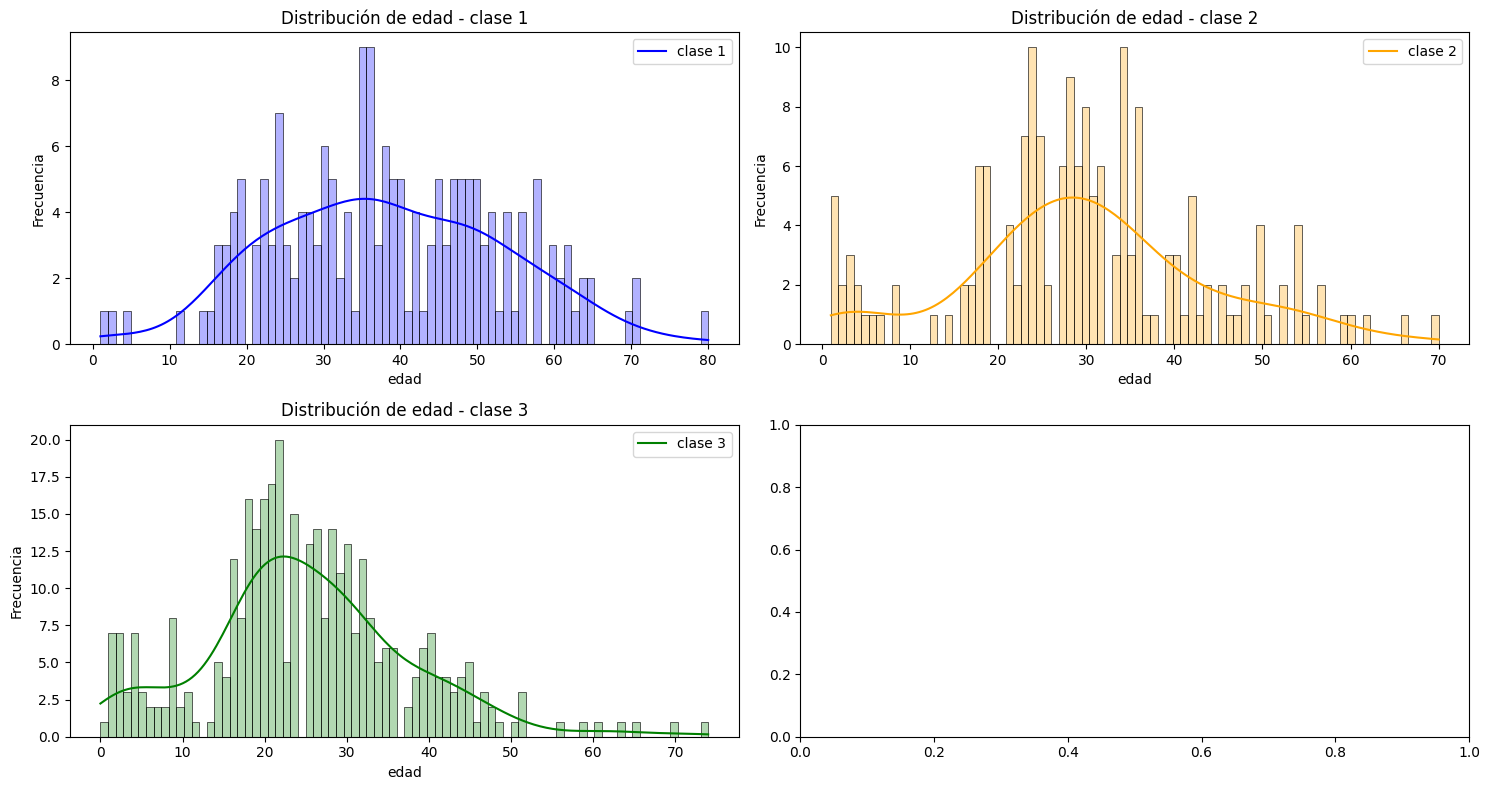

In [22]:
from f_func import histog

histog(dfs,'edad','clase',0,[80],2,[15,8],['blue','orange','green'],1)

La idea ahora es salvar los registros con edades faltantes reemplazando los NaNs con valores probables de modo que no cambien la forma de la distribución de los respectivos histogramas. Para ello, se realiza lo siguiente:
- Se genera un array de reemplazos en función de las probabilidades calculadas por KDE del histograma.
- Se reemplazan los NaNs por estos valores y se verifican los histogramas.

Generación  de arrays de reemplazos con la funcion rkdefit del módulo f_func archivo dataSeries.

In [23]:
from f_func import rkdefit

clases=dfs['clase'].unique()
valores=[]

for i, clase in enumerate(clases):
    cond=dfs['clase'] == clase
    val=rkdefit(dfs[cond]['edad'],0,80)
    valores.append(val)
    print(f'Clase {clase} n={len(valores[i])}, min val={min(valores[i])}, max val={max(valores[i])}')
    print(f'NaNs: {dfs[cond]["edad"].isna().sum()}')

Clase 3 n=136, min val=0, max val=75
NaNs: 136
Clase 1 n=30, min val=14, max val=55
NaNs: 30
Clase 2 n=11, min val=2, max val=69
NaNs: 11


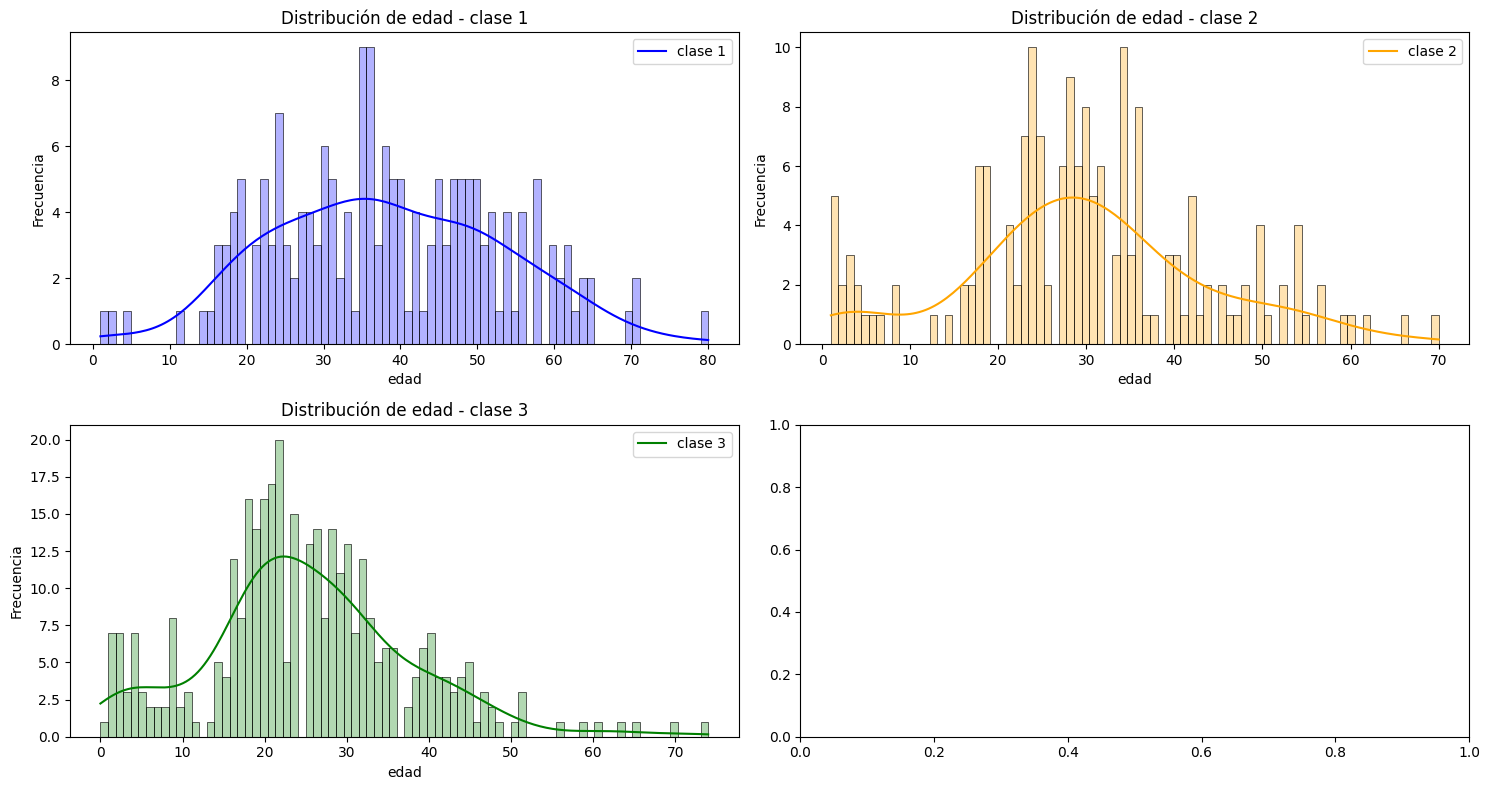

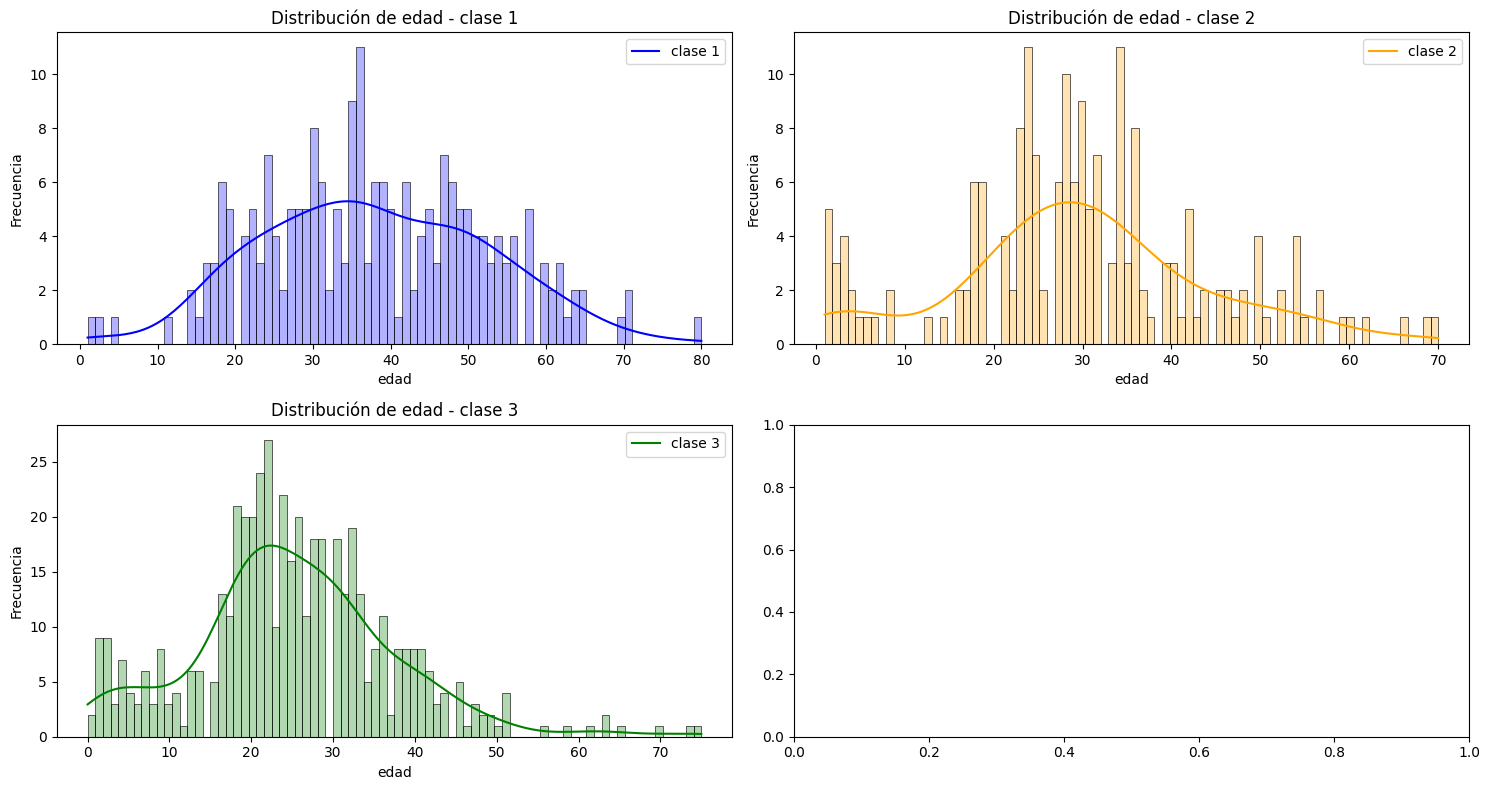

In [24]:
dfa=dfs.copy()
for i,clase in enumerate(clases):
    dfa.loc[(dfa['clase'] == clase) & dfa['edad'].isna(), 'edad'] = valores[i]

histog(dfs,'edad','clase',0,[80],2,[15,8],['blue','orange','green'],1)
histog(dfa,'edad','clase',0,[80],2,[15,8],['blue','orange','green'],1)


In [25]:
dfa['edad'].isna().sum()

0

In [26]:
#defino la variable target
# y = df.Survived

In [27]:
#Se define la variable objetivo
y = dfa.vivo

In [28]:
X = dfa.copy()
X = X.drop('vivo', axis=1)

3) ¿ Cuántas filas tiene el dataset?

In [29]:
# Completar
dfa.shape

(891, 7)

4) ¿Hay nulos?

In [30]:
# Completar
dfa.isna().sum()

vivo           0
clase          0
sexo           0
edad           0
hermaCony      0
padresHijos    0
tarifa         0
dtype: int64

5) Hay columnas, que a simple vista podemos darnos cuenta que no nos sirven para predecir si un pasajero sobrevivió o no. Por ejemplo, piensan que el nombre de un pasajero puede influir en algo? Ids?

Descartar todas estas columnas.

Para no modificar el dataset original, creemos una copia antes de hacerlo y a partir de este punto trabajemos sobre la copia.

6) Ahora que eliminamos columnas que no nos sirven, volvamos a ver en que columnas nos quedaron nulos (en valor absoluto y en porcentaje)

In [31]:
# Completar
dfa.head()

,vivo,clase,sexo,edad,hermaCony,padresHijos,tarifa
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


7) Ahora, como vamos a usar estos datos para entrenar un modelo de machine learning que no acepta nulos, debemos completar los valores faltantes o descartar las instancias con faltantes. Tomar una decision y ejecutarlo:

In [32]:
# Completar

8) Tenemos features que sean categóricas? Recuerden que un modelo de machine learning no entiene que significa "male" o "female". Por lo tanto, tenemos que aplicar algún encoder a estos datos.

Listar las variables categóricas y aplicarles el encoder que mejor se ajuste según su criterio:

In [33]:
# COMPLETAR
lista_categoricas=list(dfa.select_dtypes(include='object'))
lista_categoricas

['sexo']

In [34]:
dfa['sexo_enc']=dfa['sexo'].replace({'female':0,'male':1})
dfa.head()

,vivo,clase,sexo,edad,hermaCony,padresHijos,tarifa,sexo_enc
0,0,3,male,22,1,0,7.2500,1
1,1,1,female,38,1,0,71.2833,0
2,1,3,female,26,0,0,7.9250,0
3,1,1,female,35,1,0,53.1000,0
4,0,3,male,35,0,0,8.0500,1


9) ¿Alguna de las features tiene outliers? En caso de ver outliers, tomar alguna desición con lo que sabemos para limpiarlos. Una opción puede ser simplemente descartar estas observaciones.

In [35]:
# COMPLETAR
info_df = pd.DataFrame(dfa.dtypes, columns=['Tipo de dato'])
info_df['Valores no nulos'] = dfa.count()
info_df['NaNs'] = dfa.isna().sum()
info_df['Valores únicos'] = dfa.nunique()
info_df['Valores cero'] = (dfa.eq(0)).sum()
info_df.T

,vivo,clase,sexo,edad,hermaCony,padresHijos,tarifa,sexo_enc
Tipo de dato,int64,int64,object,Int64,int64,int64,float64,int64
Valores no nulos,891,891,891,891,891,891,891,891
NaNs,0,0,0,0,0,0,0,0
Valores únicos,2,3,2,73,7,7,248,2
Valores cero,549,0,0,2,608,678,15,314


In [36]:
dfa.describe(percentiles=[]).round(2)

,vivo,clase,edad,hermaCony,padresHijos,tarifa,sexo_enc
count,891.00,891.00,891.0,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.27,0.52,0.38,32.20,0.65
std,0.49,0.84,14.18,1.10,0.81,49.69,0.48
min,0.00,1.00,0.0,0.00,0.00,0.00,0.00
50%,0.00,3.00,28.0,0.00,0.00,14.45,1.00
max,1.00,3.00,80.0,8.00,6.00,512.33,1.00


10) Ahora que tenemos nuestros datos más limpios, tenemos que analizar los datos para ver que features pueden ayudarnos a predecir si un pasajero sobrevivió o no. (Empezamos la etapa de EDA del proyecto)

Primero que nada queremos saber como están distribuidas las clases que queremos predecir. ¿ Qué porcentaje de pasajeros sobrevivió ? 

Graficar con un countplot y luego hacer un value counts.

In [37]:
# COMPLETAR
res=dfa['vivo'].value_counts().reset_index()
res['porcentaje']=round(dfa['vivo'].value_counts(normalize=True)*100)
res

,vivo,count,porcentaje
0,0,549,62.0
1,1,342,38.0


Siempre que vayamos a entrenar un modelo de machine learning, tenemos que tomar como punto de partida lo que se conoce como un "baseline". Un baseline, sería buscar una solución simple al problema sin gastarnos en hacer ningún modelo predictivo o alguna solución compleja. Por ejemplo, sabiendo que la mayor parte de los pasajeros no sobrevivieron, nuestro baseline podría ser predecir siempre 0. De esta forma, el accuracy score que obtendríamos sería igual al porcentaje de no sobrevivientes.

$$ accuracyScore = \frac {\text{número de predicciones acertadas}}{\text{número total de predicciones}}=\frac{549}{891}=0.616$$

Luego, entrenaremos nuestro modelo y compararemos el accuracy score del modelo contra el del baseline. De esta forma, podemos comparar nuestro modelo contra algo para tomar una dimensión de lo que significa la métrica que obtenemos.

Si nuestro accuracy score es > a el porcentaje de pasajeros que murieron, podemos decir que nuestro modelo es al menos aceptable. Si nuestro modelo obtiene un score peor a ese, quiere decir que no sirve y sería mejor predecir siempre 0.

11) Plotear la correlación entre las variables. Que el gráfico sea simple de ver (buen tamaño, anotado, solo la diagonal de abajo, etc).

¿Hay alguna correlación que ya se esperaban ver? ¿Alguna correlación sin sentido?





In [38]:
# COMPLETAR
dfa.drop('sexo',axis=1).corr()

,vivo,clase,edad,hermaCony,padresHijos,tarifa,sexo_enc
vivo,1.000000,-0.338481,-0.055558,-0.035322,0.081629,0.257307,-0.543351
clase,-0.338481,1.000000,-0.366859,0.083081,0.018443,-0.549500,0.131900
edad,-0.055558,-0.366859,1.000000,-0.188572,-0.152201,0.112134,0.063578
hermaCony,-0.035322,0.083081,-0.188572,1.000000,0.414838,0.159651,-0.114631
padresHijos,0.081629,0.018443,-0.152201,0.414838,1.000000,0.216225,-0.245489
tarifa,0.257307,-0.549500,0.112134,0.159651,0.216225,1.000000,-0.182333
sexo_enc,-0.543351,0.131900,0.063578,-0.114631,-0.245489,-0.182333,1.000000


12) ¿ Qué variables tomarían para la primer versión de el modelo ? 
Si necesitan graficar o investigar algo más para decidir, haganlo.

Ahora, selecciones UNICAMENTE 2 de esas variables y estas van a ser las que utilicemos para entrenar el primer modelo.

Guardar en una variable llamada X una copia de las columnas del dataset que utilizaremos como X (las 2 features que usaremos para predecir).

In [39]:
# COMPLETAR
X=dfa[['clase','sexo_enc']]
X.head()

,clase,sexo_enc
0,3,1
1,1,0
2,3,0
3,1,0
4,3,1


13) Guardar en una variable llamada y, nuestro target (survived)

In [40]:
# COMPLETAR
y=dfa[['vivo']]
y.head()

,vivo
0,0
1,1
2,1
3,1
4,0


14) Ahora que tenemos X e y, podemos definir nuestro decision tree classifier y entrenarlo. Entrenar el clasificador:

In [41]:
# COMPLETAR
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

15) Ahora, con nuestro modelo entrenado, generar las predicciones sobre el X que generamos anteriormente:

In [42]:
# COMPLETAR
yp=tree.predict(X)

16) ¿Qué accuracy score obtenemos? Recuerden que tienen los valores reales de y almacenados en la variable "y" y también tienen lo que predijeron en el punto anterior. Utilizando la función accuracy_score de sklearn pueden obtener la métrica.

In [43]:
# COMPLETAR
ac=accuracy_score(y,yp)
ac

0.7867564534231201

17) Ahora, vuelvan a entrenar el modelo, pero utilizando un nuevo X que contenga TODAS las features que les parezcan relevantes (pueden ser todas las del dataset).

In [44]:
# COMPLETAR
X2=dfa.drop(['vivo','sexo'],axis=1)
X2.head()

,clase,edad,hermaCony,padresHijos,tarifa,sexo_enc
0,3,22,1,0,7.2500,1
1,1,38,1,0,71.2833,0
2,3,26,0,0,7.9250,0
3,1,35,1,0,53.1000,0
4,3,35,0,0,8.0500,1


In [45]:
tree2 = DecisionTreeClassifier(max_depth=7)
tree2.fit(X2,y)

DecisionTreeClassifier(max_depth=7)

In [46]:
yp2=tree2.predict(X2)

18) Medir el accuracy score de este modelo entrenado con todas las variables. ¿Ven alguna mejora?

In [47]:
# COMPLETAR
ac2=accuracy_score(y,yp2)
ac2

0.8765432098765432

In [48]:
ac2-ac

0.08978675645342316

Si mejoró un 9%.

Ahora se fabrica una función que itere y optimice depth para maximizar el accuracy_score.

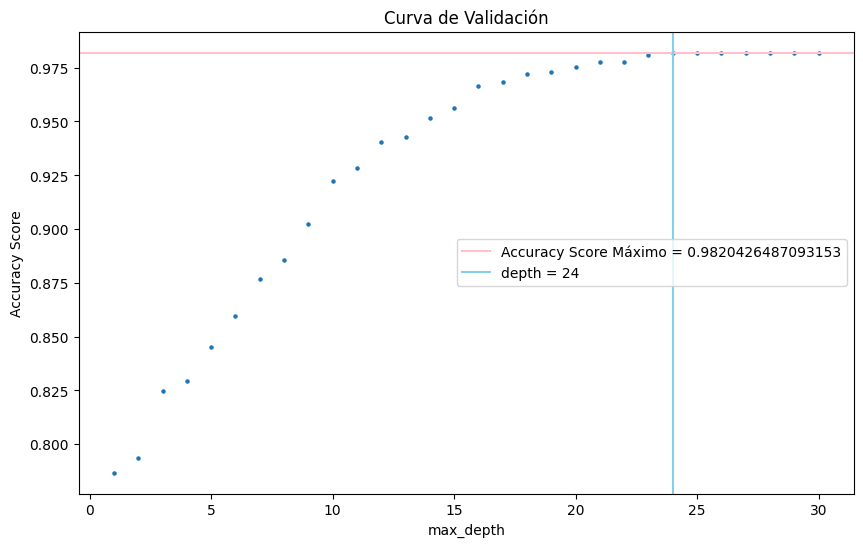

24 0.9820426487093153


In [49]:
def bestDepth(model,X,y,dm=1,dx=10,g=0):
    depths=list(range(dm,dx+1))
    ac=0
    depths_values=[]
    ac_values=[]
    for d in depths:
        model = DecisionTreeClassifier(max_depth=d)
        model.fit(X,y)
        yp2=model.predict(X)
        ac2=accuracy_score(y,yp2)
        depths_values.append(d)
        ac_values.append(ac2)
        if ac2>ac:
            ac=ac2
            depth=d
    if g:
        plt.figure(figsize=(10, 6))
        plt.scatter(depths_values,ac_values,s=5)
        plt.axhline(y=ac, color='pink', linestyle='-', label=f'Accuracy Score Máximo = {ac}')
        plt.axvline(x=depth, color='skyblue', linestyle='-', label=f'depth = {depth}')
        plt.title("Curva de Validación")
        plt.xlabel("max_depth")
        plt.ylabel("Accuracy Score")
        plt.legend(loc='center right')
        plt.show()
    return depth,ac,depths_values,ac_values

d,ac,depths,acs=bestDepth(tree2,X2,y,1,30,1)
print(d,ac)

Con depth=21 se consigue el mejor accuracy_score. Notar que llega a un maximo y se mantiene ni aumenta ni disminuye ya que al estar usando el mismo grupo para test y entrenamiento es lógico, en este punto se dice que esta "sobreentrenado" (creo expresion muy poco asertada). En realidad lo que dice es que el ajuste es el mejor para este grupo de datos en particular, como prueba, y no se podrá generalizar para otro distinto es decir este valor de accuracy score no es valido para un grupo diferente en general. Se podria entender como la maxima accuracy score que se podria lograr un valor mas real estaría por debajo de este valor.

#### Ahora se utiliza GridsearchCV.
GridsearchCV utiliza "validación cruzada" que establece en el parámetro cv la cantidad de veces que ejecuta el modelo y la proporción entre la partición de prueba y de entrenamiento. Si cv=5 significa que particiona en 5 la muestra con tamaño del 20% cada partición y toma una partición como prueba y las otras 4 como entrenamiento. Realiza esto 5 veces rotando la particion de prueba.

In [50]:
from sklearn.model_selection import GridSearchCV
tree2 = DecisionTreeClassifier()
# Definir la cuadrícula de parámetros a explorar
p_depth = {'max_depth': np.arange(1,30)}

# Inicializar GridSearchCV
grid_search = GridSearchCV(tree2, p_depth, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X2, y)

# Imprimir los mejores parámetros y el desempeño asociado
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión en entrenamiento:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 8}
Mejor precisión en entrenamiento: 0.8114744837110036


Se modifica la función bestDepth para que se comporte como GridSearchCV, es decir se particiona la muestra, para ver si los resutados son similares.

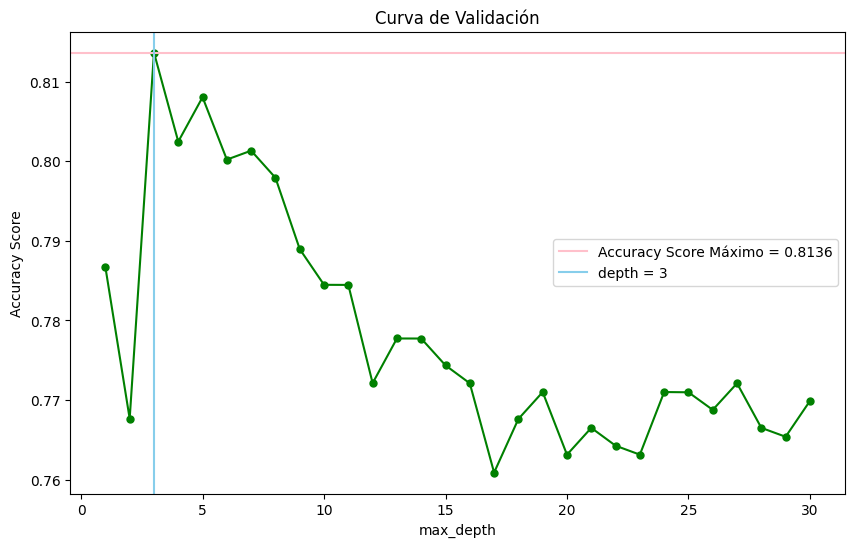

3 0.8136400728140105


In [51]:
from sklearn.model_selection import StratifiedKFold

def bestDepth(X,y,dm=1,dx=10,cv=1,g=0):
    depths=list(range(dm,dx+1))
    ac=0
    depths_values=[]
    ac_values=[]
    # Crea una instancia de StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=7)
    particiones = list(stratified_kfold.split(X, y))
    for d in depths:
        ac1=0
        for train_i, test_i in particiones:
            # Definición de valores de entrenamiento Xe ye y valores de prueba Xpr ypr
            Xt,yt=X.iloc[test_i],y.iloc[test_i]
            Xe,ye=X.iloc[train_i],y.iloc[train_i]
            model = DecisionTreeClassifier(max_depth=d)
            model.fit(Xe,ye)
            ypt=model.predict(Xt)
            ac1+=accuracy_score(yt,ypt)
        ac2=ac1/cv
        depths_values.append(d)
        ac_values.append(ac2)
        if ac2>ac:
            ac=ac2
            depth=d
    if g:
        plt.figure(figsize=(10, 6))
        # plt.scatter(depths_values,ac_values,s=5)
        plt.plot(depths_values, ac_values, color="green", marker='o',markersize=5)
        plt.axhline(y=ac, color='pink', linestyle='-', label=f'Accuracy Score Máximo = {np.round(ac,4)}')
        plt.axvline(x=depth, color='skyblue', linestyle='-', label=f'depth = {depth}')
        plt.title("Curva de Validación")
        plt.xlabel("max_depth")
        plt.ylabel("Accuracy Score")
        plt.legend(loc='center right')
        plt.show()
    return depth,ac,depths_values,ac_values

d,ac,depths,acs=bestDepth(X2,y,1,30,5,1)
print(d,ac)

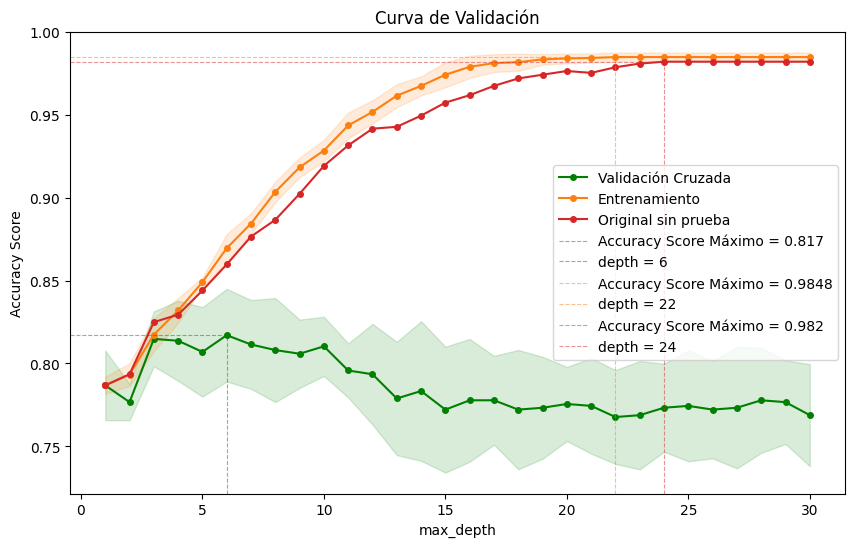

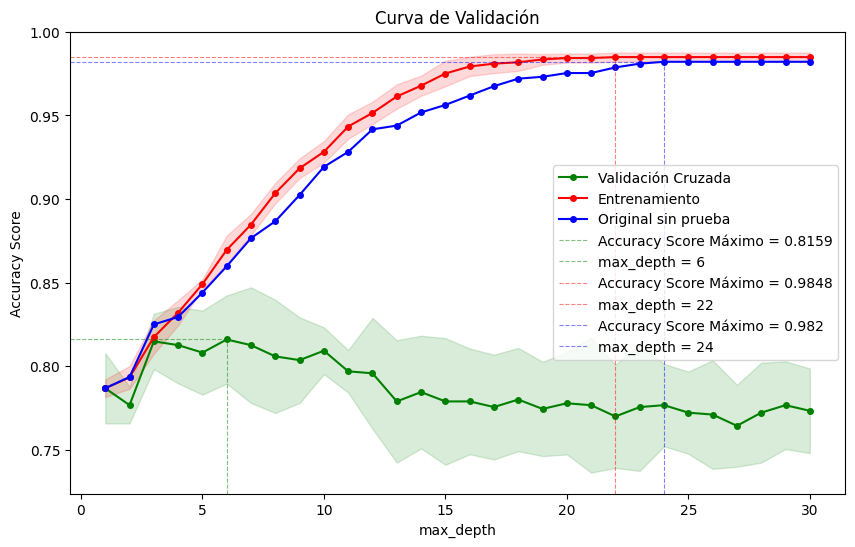

In [52]:
from f_func import bestDepth,bestParam
d,ac,sd,depths,acs,sds=bestDepth(X2,y,1,30,5,1,(10,6),['green','#FF7F0E','#D62728'])
d,ac,sd,depths,acs,sds=bestParam(X2,y,tree2,['max_depth',1,30],cv=5,g=1,fig=(10,6),colores=['green','red','blue'])

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
tree2 = DecisionTreeClassifier()

param_dist = {'max_depth': randint(1, 20)}
random_search = RandomizedSearchCV(tree2, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy')
random_search.fit(X2, y)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor precisión en entrenamiento:", random_search.best_score_)

Mejores parámetros: {'max_depth': 3}
Mejor precisión en entrenamiento: 0.8080911430544223


In [54]:
from sklearn.model_selection import validation_curve
tree2 = DecisionTreeClassifier()

param_range = range(1, 30)
train_scores, test_scores = validation_curve(
    tree2, X2, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

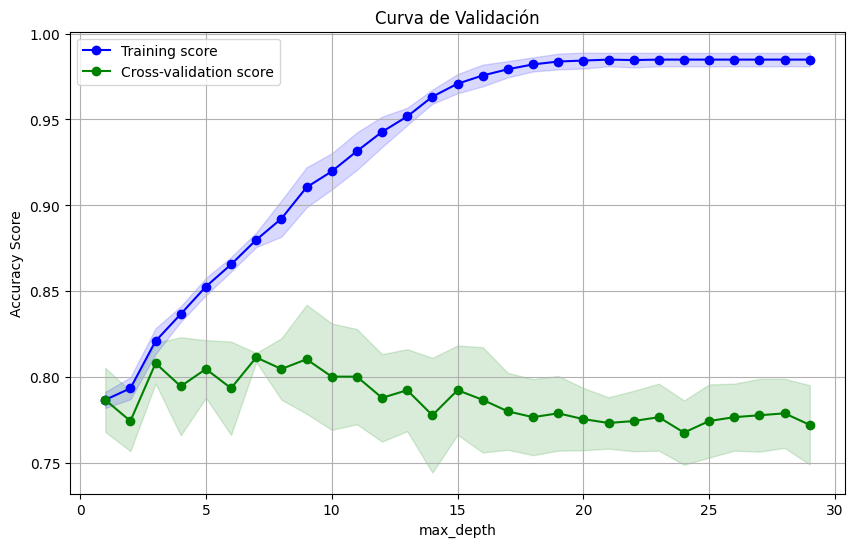

In [55]:
# Calcular las medias y desviaciones estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color="green")

# Etiquetas y título del gráfico
plt.title("Curva de Validación")
plt.xlabel("max_depth")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [56]:
train_mean

array([0.7867552 , 0.79349126, 0.82098744, 0.83670005, 0.85269395,
       0.86559954, 0.87990962, 0.8922546 , 0.91049254, 0.91975196,
       0.93153789, 0.94276006, 0.95173976, 0.96324283, 0.97081843,
       0.97558819, 0.97923594, 0.98204217, 0.9837252 , 0.9842866 ,
       0.98484761, 0.98456711, 0.98484761, 0.98484761, 0.98484761,
       0.98484761, 0.98484761, 0.98484761, 0.98484761])

0.9876 sería el mejor valor posible de score ya que es el valor de error de obtenido al predecir los valores de ajuste. (para mi mal llamado sobreajuste u overfit)

Ahora se prueba con RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Crear un modelo de RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
random_forest_model.fit(X, np.ravel(y))

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X)

# Calcular la precisión del modelo
accuracy = accuracy_score( np.ravel(y), y_pred)
print(f'Precisión del modelo: {accuracy:1.2f}')

Precisión del modelo: 0.79


In [58]:
# Entrenar el modelo
random_forest_model.fit(X2, np.ravel(y))

# Realizar predicciones en el conjunto de prueba
y2_pred = random_forest_model.predict(X2)

# Calcular la precisión del modelo
accuracy = accuracy_score( np.ravel(y), y2_pred)
print(f'Precisión del modelo: {accuracy:1.2f}')

Precisión del modelo: 0.98


In [59]:
# Definir la cuadrícula de parámetros a explorar
n_est= {'n_estimators': [3,5,6,7,10,50,100,150,200,250]}

random_forest_model = RandomForestClassifier( random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(random_forest_model, n_est, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X2, np.ravel(y))

# Imprimir los mejores parámetros y el desempeño asociado
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión en entrenamiento:", grid_search.best_score_)

Mejores parámetros: {'n_estimators': 150}
Mejor precisión en entrenamiento: 0.8036344234511329


In [60]:
from sklearn.svm import SVC

# Crear un modelo de Máquinas de Soporte Vectorial
svm_model = SVC(random_state=43)

# Entrenar el modelo
svm_model.fit(X2, np.ravel(y))

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X2)

# Calcular la precisión del modelo
accuracy = accuracy_score(np.ravel(y), y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.69


In [61]:
# # Definir los parámetros a ajustar
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Parámetro de regularización
#     'kernel': ['linear', 'rbf', 'poly'],  # Tipo de kernel
# }


# # Crear el objeto GridSearchCV
# grid_search = GridSearchCV(svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Realizar la búsqueda de parámetros óptimos
# grid_search.fit(X2, np.ravel(y))

# # Mostrar los resultados
# print("Mejores parámetros encontrados:")
# print(grid_search.best_params_)

# # Obtener el mejor modelo
# best_svm_model = grid_search.best_estimator_

# # Evaluar el modelo en el conjunto de prueba
# y_pred = best_svm_model.predict(X2)
# accuracy = accuracy_score(np.ravel(y), y_pred)
# print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear un modelo de KNN (por ejemplo, con K=3)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn_model.fit(X2, np.ravel(y))

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X2)

# Calcular precisión
accuracy = accuracy_score(np.ravel(y), y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Imprimir informe de clasificación
print(classification_report(np.ravel(y), y_pred))

Precisión del modelo: 0.83
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.80      0.74      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [63]:
# Definir los parámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Puedes ajustar estos valores según sea necesario
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de parámetros óptimos
grid_search.fit(X2, np.ravel(y))

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Mejores parámetros encontrados:
{'n_neighbors': 3}
